# CREATED_BY_GAURAV_KANOJIA

In [65]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [66]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [67]:
df = pd.read_csv('dataset.csv')

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1119 entries, 0 to 1118
Data columns (total 14 columns):
age         1119 non-null int64
sex         1119 non-null int64
cp          1119 non-null int64
trestbps    1119 non-null int64
chol        1119 non-null int64
fbs         1119 non-null int64
restecg     1119 non-null int64
thalach     1119 non-null int64
exang       1119 non-null int64
oldpeak     1119 non-null float64
slope       1119 non-null int64
ca          1119 non-null int64
thal        1119 non-null int64
target      1119 non-null int64
dtypes: float64(1), int64(13)
memory usage: 122.5 KB


In [69]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000
mean,54.267203,0.689008,0.984808,131.382484,246.102770,0.151028,0.529937,150.084004,0.321716,1.038785,1.403038,0.713137,2.305630,0.535299
std,9.057119,0.463106,1.032019,17.355751,52.068683,0.358236,0.525509,22.818921,0.467343,1.151765,0.619618,1.014615,0.613995,0.498975
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,136.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.000000,0.000000,1.000000,168.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [70]:
df.shape

(1119, 14)

## Feature Selection

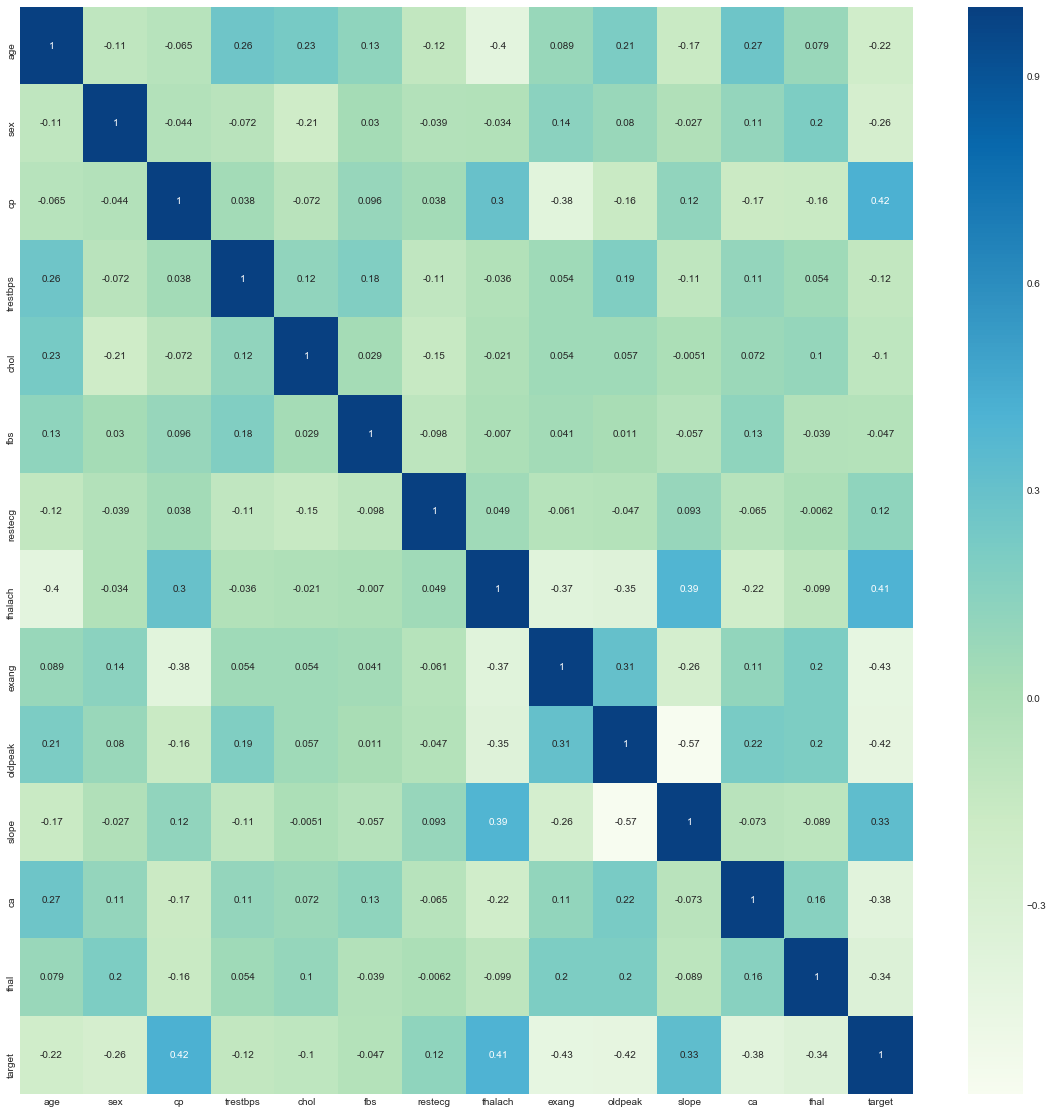

In [71]:
import seaborn as sns
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="GnBu")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D2FBC77A20>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001D2F808C6A0>]], dtype=object)

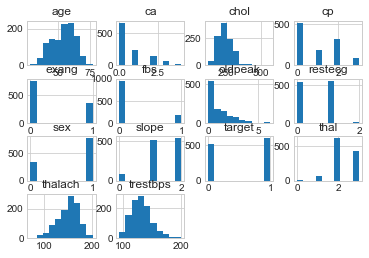

In [72]:
df.hist()

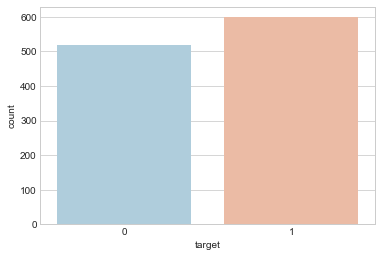

In [73]:
sns.set_style('whitegrid')
sns.countplot(x='target',data=df,palette='RdBu_r')

In [74]:
dataset = pd.get_dummies(df, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

In [75]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,52,125,212,168,1.0,0,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
1,53,140,203,155,3.1,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,1
2,70,145,174,125,2.6,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,1
3,61,148,203,161,0.0,0,0,1,1,0,...,1,0,1,0,0,0,0,0,0,1
4,62,138,294,106,1.9,0,1,0,1,0,...,0,0,0,0,1,0,0,0,1,0


In [76]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])

In [77]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,-0.250435,-0.367909,-0.655250,0.785489,-0.033689,0,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
1,-0.139975,0.496744,-0.828176,0.215531,1.790415,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,1
2,1.737841,0.784962,-1.385382,-1.099755,1.356104,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,1
3,0.743703,0.957893,-0.828176,0.478589,-0.902310,0,0,1,1,0,...,1,0,1,0,0,0,0,0,0,1
4,0.854163,0.381457,0.920297,-1.932770,0.748070,0,1,0,1,0,...,0,0,0,0,1,0,0,0,1,0


In [78]:
dataset.to_csv("dataset_new.csv")

In [79]:
y = dataset['target']
X = dataset.drop(['target'], axis = 1)

In [80]:
from sklearn.model_selection import cross_val_score
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    score=cross_val_score(knn_classifier,X,y,cv=10)
    knn_scores.append(score.mean())

Text(0.5,1,'K Neighbors Classifier scores for different K values')

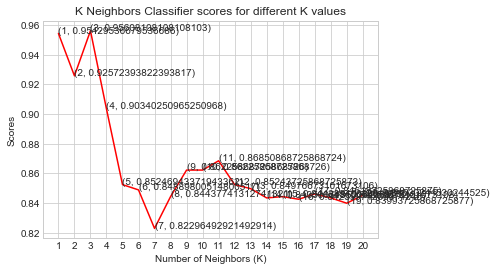

In [81]:
plt.plot([k for k in range(1, 21)], knn_scores, color = 'red')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

In [82]:
knn_classifier = KNeighborsClassifier(n_neighbors = 1)
score=cross_val_score(knn_classifier,X,y,cv=10)


In [83]:
score.mean()

0.95429536679536686

# decion tree

In [84]:
from sklearn.model_selection import train_test_split

#test_size=0.25 means that make train set as 75% and test set as 25%

stratify=y makes the distribution simalar 

In [85]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state = 101, stratify=y, test_size=0.25)

In [86]:
y_train.value_counts(normalize=True)

1    0.535161
0    0.464839
Name: target, dtype: float64

In [87]:
y_valid.value_counts(normalize=True)

1    0.535714
0    0.464286
Name: target, dtype: float64

In [88]:
X_train.shape, y_train.shape

((839, 30), (839,))

In [89]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score

In [90]:
max_accuracy = 0


for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,y_train)
    Y_pred_dt = dt.predict(X_valid)
    current_accuracy = round(accuracy_score(Y_pred_dt,y_valid)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x

dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,y_train)
y_pred_dt = dt.predict(X_valid)

In [91]:
round(accuracy_score(y_pred_dt,y_valid)*100,2)

96.069999999999993

# Random forest

In [92]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0


for x in range(200):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_valid,y_valid)
    Y_pred_rf = rf.predict(X_valid)
    current_accuracy = round(accuracy_score(Y_pred_rf,y_valid)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_valid,y_valid)
y_pred_rf = rf.predict(X_valid)

In [93]:
round(accuracy_score(y_pred_rf,y_valid)*100,2)

99.290000000000006

# kmeans algorithm

In [94]:
from sklearn.cluster import KMeans

In [95]:
SSE_scaled = []

In [96]:
for cluster in range(1,20):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster)
    kmeans.fit(dataset)
    SSE_scaled.append(kmeans.inertia_)

Text(0,0.5,'SSE')

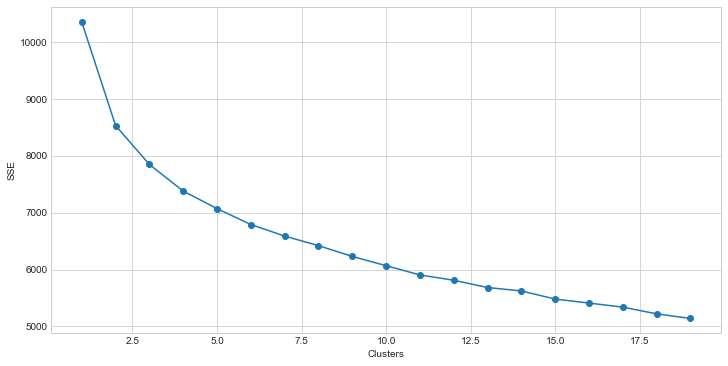

In [97]:
plt.figure(figsize=(12,6))
frame_scaled = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE_scaled})
plt.plot(frame_scaled['Cluster'], frame_scaled['SSE'], marker='o')
plt.xlabel("Clusters")
plt.ylabel("SSE")

In [98]:
kmeans = KMeans(n_jobs = -1, n_clusters = 2)
kmeans.fit(dataset)
pred = kmeans.predict(dataset)

In [99]:
pred

array([1, 0, 0, ..., 1, 1, 1])

In [100]:
frame1 = pd.DataFrame(dataset)

In [101]:
frame1['cluster'] = pred

In [102]:
frame1['cluster'].value_counts()

1    660
0    459
Name: cluster, dtype: int64

In [103]:
frame1.head(20)

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3,cluster
0,-0.250435,-0.367909,-0.655250,0.785489,-0.033689,0,0,1,1,0,...,0,0,1,0,0,0,0,0,1,1
1,-0.139975,0.496744,-0.828176,0.215531,1.790415,0,0,1,1,0,...,1,0,0,0,0,0,0,0,1,0
2,1.737841,0.784962,-1.385382,-1.099755,1.356104,0,0,1,1,0,...,1,0,0,0,0,0,0,0,1,0
3,0.743703,0.957893,-0.828176,0.478589,-0.902310,0,0,1,1,0,...,0,1,0,0,0,0,0,0,1,1
4,0.854163,0.381457,0.920297,-1.932770,0.748070,0,1,0,1,0,...,0,0,0,1,0,0,0,1,0,0
5,0.412324,-1.808998,0.036453,-1.231284,-0.033689,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
6,0.412324,-1.001988,1.381433,-0.442112,2.919622,0,0,1,1,0,...,0,0,0,1,0,0,1,0,0,0
7,0.080945,1.649615,0.824227,-0.222897,-0.207413,0,0,1,1,0,...,0,1,0,0,0,0,0,0,1,0
8,-0.913193,-0.656127,0.055667,-0.266740,-0.207413,0,0,1,1,0,...,1,0,0,0,0,0,0,0,1,1
9,-0.029515,-0.540840,0.766585,-1.494341,1.877277,0,0,1,1,0,...,0,0,1,0,0,0,0,1,0,0


In [104]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

In [105]:
result = confusion_matrix(frame1['target'],frame1['cluster'])

In [106]:
result

array([[383, 137],
       [ 76, 523]], dtype=int64)

In [107]:
accuracy_score(frame1['target'],frame1['cluster'])

0.80965147453083108

In [108]:
classification_report(frame1['target'],frame1['cluster'])

'             precision    recall  f1-score   support\n\n          0       0.83      0.74      0.78       520\n          1       0.79      0.87      0.83       599\n\navg / total       0.81      0.81      0.81      1119\n'

# logistic regression

In [109]:
from sklearn.linear_model import LogisticRegression

In [110]:
lr = LogisticRegression()

In [111]:
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [112]:
y_pred_lr = lr.predict(X_valid)

In [113]:
round(accuracy_score(y_pred_lr,y_valid)*100,2)

85.0

# navie bayes

In [114]:
from sklearn.naive_bayes import GaussianNB

In [115]:
nb=GaussianNB()

In [116]:
nb.fit(X_train,y_train)

GaussianNB(priors=None)

In [117]:
y_pred_nb=nb.predict(X_valid)

In [118]:
round(accuracy_score(y_pred_nb,y_valid)*100,2)

84.290000000000006

# support vector (svm)

In [119]:
from sklearn import svm

In [120]:
sv = svm.SVC(kernel='linear')

In [121]:
sv.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [122]:
y_pred_sv = sv.predict(X_valid)

In [123]:
round(accuracy_score(y_pred_sv,y_valid)*100,2)

86.430000000000007